<a href="https://colab.research.google.com/github/Joel-Vijo/Dino_names_generator/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn
import numpy as np
import random
import matplotlib.pyplot  as plt

In [ ]:
data = open('dinosaurs.csv', 'r').read() 
data = data.lower()
chars = list(set(data))
chars.remove('\n')
chars.sort()
print(chars)
data_size, chars_size = len(data), len(chars)

print("data size= " ,data_size)
print("no of unique chars = " ,chars_size)

char_to_ix = {ch:i for i,ch in enumerate(chars)}   
ix_to_char = {i:ch for i,ch in enumerate(chars)}    
data = data.split('\n')
print(data)
print(list(data[0]))
random.shuffle(data)

['_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
data size=  19656
no of unique chars =  27
['aachenosaurus', 'aardonyx', 'abelisaurus', 'abrictosaurus', 'abrosaurus', 'abydosaurus', 'acantholipan', 'acanthopholis', 'achelousaurus', 'acheroraptor', 'achillesaurus', 'achillobator', 'acristavus', 'acrocanthosaurus', 'acrotholus', 'actiosaurus', 'adamantisaurus', 'adasaurus', 'adelolophus', 'adeopapposaurus', 'adratiklit', 'adynomosaurus', 'aegyptosaurus', 'aeolosaurus', 'aepisaurus', 'aepyornithomimus', 'aerosteon', 'afromimus', 'aetonyx', 'afrovenator', 'agathaumas', 'aggiosaurus', 'agilisaurus', 'agnosphitys', 'agrosaurus', 'agujaceratops', 'agustinia', 'ahshislepelta', 'airakoraptor', 'ajancingenia', 'ajkaceratops', 'akainacephalus', 'alamosaurus', 'alaskacephale', 'albalophosaurus', 'albertaceratops', 'albertadromeus', 'albertavenator', 'albertonykus', 'albertosaurus', 'albinykus', 'alcovasaurus', 

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.input_size = input_size 
        self.output_size = input_size 

        self.rnn = nn.GRU(input_size,hidden_size)
        self.h2o = nn.Linear(hidden_size, input_size)

    def forward(self, input, hidden):

        output,hidden=self.rnn(input,hidden)
        output=self.h2o(output)
        return hidden , output 

In [ ]:
learning_rate = 0.001

model = RNN(input_size=chars_size, hidden_size=100)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
no_of_epochs=30
hidden_size=100
loss=[]
for i in range(no_of_epochs):
    epoch_loss = 0
    n = 0
    for word in data:
        letters=list(word)
        hidden=torch.zeros([1,1,hidden_size])
        outputs=torch.zeros([len(letters)+1,chars_size])
        target=list()
        for c in letters:
          target.append(char_to_ix[c])
        target.append(char_to_ix['_'])
        target_tensor=torch.LongTensor(target)
        outputs[0,char_to_ix[letters[0]]]=1
        i=0
        batch_loss=0
        while(i<len(letters)):
          input=torch.zeros([1,chars_size],dtype=torch.float)
          input[0,char_to_ix[letters[i]]]=1
          input=input.unsqueeze(1)
          hidden,output=model(input,hidden)
          outputs[i+1]=output
          i+=1
        batch_loss=criterion(outputs,target_tensor)
        epoch_loss+=batch_loss
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
        n+=1
    epoch_loss=epoch_loss/n
    print(epoch_loss.item())
    loss.append(epoch_loss.item())

2.1375746726989746
1.8281638622283936
1.7311909198760986
1.6618523597717285
1.6079928874969482
1.5636725425720215
1.5238579511642456
1.4857436418533325
1.4479926824569702
1.4101917743682861
1.3720074892044067
1.3332539796829224
1.2941738367080688
1.2551487684249878
1.2174831628799438
1.181427240371704
1.1489067077636719
1.116925597190857
1.0903987884521484
1.0629632472991943
1.035271406173706
1.0124279260635376
0.9922187924385071
0.9713345170021057
0.9547164440155029
0.9424368143081665
0.9282976984977722
0.9101054668426514
0.9002645015716553
0.8895940184593201


In [ ]:
model.eval()
hidden_size = 100
for letter in chars:
    if(letter!="_"):
      print(letter,"-",end="")
      print(letter,end="")
      char = letter
      input_idx = char_to_ix[char]
      input = torch.zeros([1, chars_size], dtype=torch.float)
      input[0, input_idx] = 1
      input=input.unsqueeze(1)
      

      hidden = torch.zeros([1, 1,hidden_size])
      idx = torch.tensor(char_to_ix[letter])
      i=0
      while ix_to_char[idx.item()] != "_":
          i+=1
          hidden, output = model(input, hidden)
          idx = output.argmax()
          input = torch.zeros([1, chars_size], dtype=torch.float)
          input[0, idx] = 1
          input=input.unsqueeze(1)
          if(ix_to_char[idx.item()]!="_"):
            print(ix_to_char[idx.item()],end="")
      print("")

a -anthoceratops
b -barasaurus
c -camptosaurus
d -dinotyrannus
e -eoceratops
f -fukuititan
g -gallimimus
h -hepatasaurus
i -ingenia
j -jingxingosaurus
k -kandusaurus
l -lambyisaurus
m -marasuchus
n -neosodon
o -ornithopsis
p -parasaurolophus
q -qiupalong
r -rapatoraptor
s -sinopeltosaurus
t -tanystropheus
u -uranosaurus
v -velafrons
w -walkertosaurus
x -xingwia
y -yungyanglong
z -zhunghungosaurus


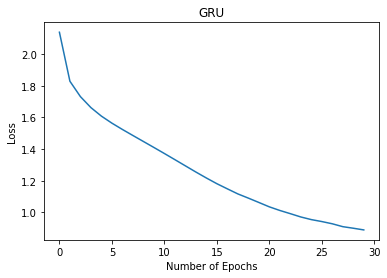

In [ ]:
plt.title("GRU")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(loss, label = "Training Loss")
plt.show()